In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'NanumGothicCoding'
# plt.rcParams['font.size'] = 15
import seaborn as sns
import missingno as msno
plt.rc('font', family='D2Coding')

In [2]:
# !pip install plotnine #시각화 라이브러리 => R에서 시각화하는 방법과 유사하게 시각화한다.
from plotnine import *

In [3]:
#현재 소스 프로그램이 위치한 경로의 파일 목록을 보여준다.
%pwd

'C:\\coding\\Tjoeun\\04_data\\03_dataAnalysis\\workspace'

In [6]:
# 현재 소스 프로그램이 위치한 경로의 파일 목록을 보여준다.
%ls
# '$ls 폴더이름'으로 실행하면 현재 소스 프로그램이 위치한 경로 아래의 지정된 파일 목록을 보여준다.


 C 드라이브의 볼륨: OS
 볼륨 일련 번호: 4696-5675

 C:\coding\Tjoeun\04_data\03_dataAnalysis\workspace 디렉터리

2023-09-04  오후 03:23    <DIR>          .
2023-09-01  오전 09:12    <DIR>          ..
2023-09-04  오전 10:50    <DIR>          .ipynb_checkpoints
2023-08-28  오후 03:21             6,687 00_numpy_0_axis.ipynb
2023-08-29  오전 10:36           122,241 01_numpy_1.ipynb
2023-08-29  오전 11:56            35,885 02_numpy_2.ipynb
2023-08-29  오후 05:04            59,812 03_numpy_3.ipynb
2023-08-31  오후 12:04            75,450 04_pandas_1.ipynb
2023-08-30  오후 04:10            78,764 05_pandas_2.ipynb
2023-08-31  오후 09:23           130,247 06_pandas_3.ipynb
2023-08-31  오후 03:38           167,412 07_pandas_4.ipynb
2023-08-31  오후 03:38            77,390 08_pandas_5.ipynb
2023-08-31  오후 04:26            51,579 09_pandas_6.ipynb
2023-08-31  오후 04:55            12,535 10_pandas_7.ipynb
2023-09-01  오전 11:56               915 11_matplotlib_hangle.ipynb
2023-09-01  오후 01:02           108,171 12_anscombe.ipynb
2023-09-01  

2015년 10월부터 2023년 6월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향 --
공공데이터포털에서 다운

In [7]:
#read_csv() 메소드 이용
# per_sale = pd.read_csv('./data/전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='euc-kr')
# per_sale = pd.read_csv('./data/전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='cp949')
per_sale = pd.read_csv('./data/전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='ms949', engine='python')
# encoding 옵션을 지정하지 않고 사용하려면 csv 파일을 메모장으로 열고 파일 메뉴의 다른 이름으로 저장한 후 인코딩을 utf-8로 바꿔서 저장하면 된다.
per_sale

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
7900,제주,모든면적,2023,6,7326
7901,제주,전용면적 60제곱미터이하,2023,6,7381
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,7084
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639


In [8]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


dtypes 속성이나 info() 메소드를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 필요하다면 변경한다.

In [9]:
per_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [10]:
per_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


In [11]:
#연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열로 변환한다. 
per_sale['연도'] = per_sale['연도'].astype(str)
per_sale.월 = per_sale.월.astype(str)
# 데이터프레임의 특정 열 1개를 얻어올 떄 데이터프레임(열)
per_sale.dtypes

지역명           object
규모구분          object
연도            object
월             object
분양가격(제곱미터)    object
dtype: object

In [12]:
# 분양가격(제곱미터)는 연산에 사용할 데이터이므로 숫자로 변경된다. 
# per_sale['분양가격(제곱미터)'] = per_sale['분양가격(제곱미터)'].astype(float) # 에로
# astype() 메소드는 무자열과 숫자로 변경하려는 경우 숫자가 아닌 문자열이 있으면 에러가 발생한다. 
# 이때, to_numeric() 메소드를 사용하면 어느정도 오류를 제어할 수 있다. 
# to_numeric() 메소드의 errors 속성은 기본값이 raise로 숫자로 변경할 수 없는 값이 있으면 오류를 발생시킨다.
# errors 속성값을 ignore를 사용하면 숫자로 변경할 수 없는 값이 있으면 메소드를 무시한다.
# coerce 속성값은 숫자로 변경할 수 없는 값이 있으면 데이터를 누락값으로 변경한다. 
per_sale['분양가격(제곱미터)'] = pd.to_numeric(per_sale['분양가격(제곱미터)'], errors='coerce')
# 데이터의 '분양가격(제곱미터)'열에 '6,934' 형태로 입력되서 누락값으로 처리되는 문제가 발생할 수 있다. 
# csv 파일을 열어서 데이터의 서식을 일반으로 변경한 후 다시 저장해서 사용한다. => 엑셀 작업은 영상을 참조한다. 

In [13]:
per_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
dtype: object

In [14]:
# 숫자로 변경된 '분양가격(제곱미터)'열을 이용해서 평당 분양 가격을 계산한 열을 추가한다. 
per_sale['평당분양가격'] = per_sale['분양가격(제곱미터)'] * 3.3
per_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object

In [15]:
per_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         7905 non-null   object 
 1   규모구분        7905 non-null   object 
 2   연도          7905 non-null   object 
 3   월           7905 non-null   object 
 4   분양가격(제곱미터)  7322 non-null   float64
 5   평당분양가격      7322 non-null   float64
dtypes: float64(2), object(4)
memory usage: 370.7+ KB


In [16]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


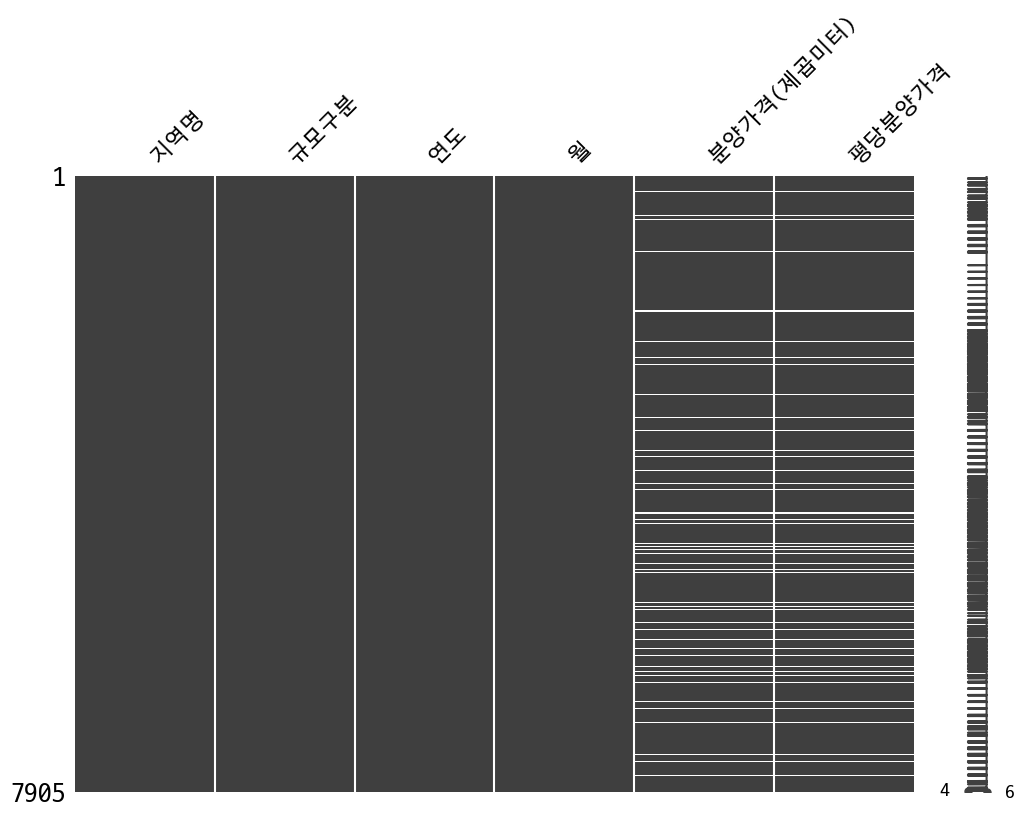

In [17]:
msno.matrix(per_sale, figsize=(12,8))
plt.show()

In [18]:
# 2017년 데이터만 추출하고 싶다.
per_sale_2017 = per_sale[per_sale['연도']== '2017']
per_sale_2017

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
1275,서울,모든면적,2017,1,6450.0,21285.0
1276,서울,전용면적 60제곱미터이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60제곱미터초과 85제곱미터이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85제곱미터초과 102제곱미터이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102제곱미터초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,모든면적,2017,12,3578.0,11807.4
2291,제주,전용면적 60제곱미터이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60제곱미터초과 85제곱미터이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85제곱미터초과 102제곱미터이하,2017,12,NaN,NaN


In [19]:
per_sale['지역명'].value_counts()

지역명
서울    465
강원    465
경남    465
경북    465
전남    465
전북    465
충남    465
충북    465
세종    465
인천    465
울산    465
대전    465
광주    465
대구    465
부산    465
경기    465
제주    465
Name: count, dtype: int64

In [20]:
per_sale['규모구분'].value_counts()

규모구분
모든면적                       1581
전용면적 60제곱미터이하              1581
전용면적 60제곱미터초과 85제곱미터이하     1581
전용면적 85제곱미터초과 102제곱미터이하    1581
전용면적 102제곱미터초과             1581
Name: count, dtype: int64

# ======전국 연도별 평균 분양 가격=======


In [21]:
per_sale.groupby(per_sale['연도'])['평당분양가격'].mean()
per_sale.groupby(per_sale['연도'])['평당분양가격'].mean()

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16277.103106
Name: 평당분양가격, dtype: float64

In [22]:
# pd.options.display.float_format 속성을 사용해서 데이터프레임에 지정된 실수 데이터의 출력 서식을 지정할 수 있다. 
# 출력 서식'{:,.1f}'는 천 단위마다 ','를 출력하고 '.'뒤의 숫자만큼 소수점 아래 자리를 표시한다. 
# 'f'를 붙이지 않으면 숫자가 지수 기호'e'를 사용하는 지수 형태로 표시된다. 
pd.options.display.float_format = '{:,.1f}'.format

In [23]:
per_sale.groupby(per_sale['연도']).describe()

분양가격(제곱미터)                                                           \
          count    mean     std     min     25%     50%     75%      max   
연도                                                                         
2015      243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5  7,092.0   
2016      984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5  8,096.0   
2017      975.0 3,143.3 1,110.5 1,976.0 2,373.0 2,838.0 3,466.0  7,887.0   
2018      919.0 3,327.0 1,186.1 2,076.0 2,525.0 2,952.0 3,698.0  8,098.0   
2019      912.0 3,693.4 1,563.2 2,124.0 2,635.5 3,395.0 4,066.2 12,728.0   
2020      882.0 3,951.3 1,632.7 2,297.0 2,780.5 3,734.5 4,441.0 13,835.0   
2021      945.0 4,132.1 1,567.7 2,409.0 3,057.0 3,858.0 4,539.0 10,746.0   
2022      979.0 4,528.0 1,521.7 2,657.0 3,284.5 4,189.0 5,231.5 10,322.0   
2023      483.0 4,932.5 1,681.5 2,785.0 3,625.0 4,659.0 5,756.0 11,911.0   

     평당분양가격                                                               
      count     mean     std     min      25%      50%      75%      max  
연도                                                                        
2015  243.0  9,202.7 3,223.6 6,164.4  7,342.5  8,302.8  9,984.1 23,403.6  
2016  984.0  9,683.0 3,535.8 6,270.0  7,530.6  8,817.6 10,390.0 26,716.8  
2017  975.0 10,372.9 3,664.7 6,520.8  7,830.9  9,365.4 11,437.8 26,027.1  
2018  919.0 10,978.9 3,914.1 6,850.8  8,332.5  9,741.6 12,203.4 26,723.4  
2019  912.0 12,188.3 5,158.6 7,009.2  8,697.1 11,203.5 13,418.6 42,002.4  
2020  882.0 13,039.4 5,388.1 7,580.1  9,175.6 12,323.8 14,655.3 45,655.5  
2021  945.0 13,636.0 5,173.4 7,949.7 10,088.1 12,731.4 14,978.7 35,461.8  
2022  979.0 14,942.5 5,021.7 8,768.1 10,838.8 13,823.7 17,263.9 34,062.6  
2023  483.0 16,277.1 5,549.1 9,190.5 11,962.5 15,374.7 18,994.8 39,306.3

In [24]:
# describe() 메소드 실행 결과를 'T' 속성을 지정해서 전치시켜서 요약 통계량을 수직 방향으로 출력할 수 있다. 
per_sale.groupby(per_sale['연도']).describe()

분양가격(제곱미터)                                                           \
          count    mean     std     min     25%     50%     75%      max   
연도                                                                         
2015      243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5  7,092.0   
2016      984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5  8,096.0   
2017      975.0 3,143.3 1,110.5 1,976.0 2,373.0 2,838.0 3,466.0  7,887.0   
2018      919.0 3,327.0 1,186.1 2,076.0 2,525.0 2,952.0 3,698.0  8,098.0   
2019      912.0 3,693.4 1,563.2 2,124.0 2,635.5 3,395.0 4,066.2 12,728.0   
2020      882.0 3,951.3 1,632.7 2,297.0 2,780.5 3,734.5 4,441.0 13,835.0   
2021      945.0 4,132.1 1,567.7 2,409.0 3,057.0 3,858.0 4,539.0 10,746.0   
2022      979.0 4,528.0 1,521.7 2,657.0 3,284.5 4,189.0 5,231.5 10,322.0   
2023      483.0 4,932.5 1,681.5 2,785.0 3,625.0 4,659.0 5,756.0 11,911.0   

     평당분양가격                                                               
      count     mean     std     min      25%      50%      75%      max  
연도                                                                        
2015  243.0  9,202.7 3,223.6 6,164.4  7,342.5  8,302.8  9,984.1 23,403.6  
2016  984.0  9,683.0 3,535.8 6,270.0  7,530.6  8,817.6 10,390.0 26,716.8  
2017  975.0 10,372.9 3,664.7 6,520.8  7,830.9  9,365.4 11,437.8 26,027.1  
2018  919.0 10,978.9 3,914.1 6,850.8  8,332.5  9,741.6 12,203.4 26,723.4  
2019  912.0 12,188.3 5,158.6 7,009.2  8,697.1 11,203.5 13,418.6 42,002.4  
2020  882.0 13,039.4 5,388.1 7,580.1  9,175.6 12,323.8 14,655.3 45,655.5  
2021  945.0 13,636.0 5,173.4 7,949.7 10,088.1 12,731.4 14,978.7 35,461.8  
2022  979.0 14,942.5 5,021.7 8,768.1 10,838.8 13,823.7 17,263.9 34,062.6  
2023  483.0 16,277.1 5,549.1 9,190.5 11,962.5 15,374.7 18,994.8 39,306.3

전국 규모별 연도별 평균 평당 분양 가격

In [25]:
# pivot_table() 메소드는 엑셀의 피벗 테이블과 유사한 형태로 데이터를 리턴한다. 
# per_sale.pivot_table(value, index, columns, aggfunc, fill_value)
# value : 피벗 테이블을 작성할 데이터프레임의 열을 지정한다. 
# index : 그룹화의 첫 번째 기준으로 사용할 데이터프레임의 열을 지정한다. => 행 단위 그룹화
# columns : 그룹화의 두 번째 기준으로 사용할 데이터프레임의 열을 지정한다. => 열 단위 그룹화 
# aggfunc : 그룹화된 결과에 적용할 함수를 지정한다.  maen이 기본값, count, sum, mean, max, min
# fill_value : 피벗 테이블에 표시되는 NaN을 대체할 데이터를 지정한다. 주로 0을 지정한다. 
per_sale.pivot_table('평당분양가격','규모구분', '연도', aggfunc='min')
per_sale_pivot = per_sale.pivot_table('평당분양가격','규모구분', '연도', aggfunc='min')
per_sale_pivot

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
규모구분,,,,,,,,,
모든면적,"6,299.7","6,299.7","6,520.8","6,854.1","7,388.7","7,606.5","8,527.2","9,028.8","10,381.8"
전용면적 102제곱미터초과,"7,164.3","7,118.1","7,055.4","7,533.9","7,626.3","8,355.6","8,570.1","9,550.2","10,434.6"
전용면적 60제곱미터이하,"6,332.7","6,270.0","6,761.7","7,101.6","7,009.2","7,669.2","8,345.7","8,768.1","9,190.5"
전용면적 60제곱미터초과 85제곱미터이하,"6,289.8","6,289.8","6,543.9","6,850.8","7,461.3","7,580.1","8,580.0","9,025.5","10,329.0"
전용면적 85제곱미터초과 102제곱미터이하,"6,164.4","6,702.3","6,639.6","7,329.3","7,712.1","7,949.7","7,949.7","9,216.9","10,282.8"


# ======전국 지역별 평균 평당 분양 가격======

In [26]:
# 규모 구분이 모든 면적으로 되어있는 평균 평당 분양 가격으로 연도별 변동 금액을 살펴보자.
# per_sale_pivot = per_sale_pivot = per_sale.pivot_table('평당분양가격','연도' , '모든면적')
# per_sale_pivot
region_year_all = per_sale[per_sale['규모구분'] == '모든면적']
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
7880,전북,모든면적,2023,6,"3,371.0","11,124.3"
7885,전남,모든면적,2023,6,"3,402.0","11,226.6"
7890,경북,모든면적,2023,6,"3,830.0","12,639.0"
7895,경남,모든면적,2023,6,"3,532.0","11,655.6"


# 여기부터 실행

In [43]:
region_year = region_year_all.pivot_table('평당분양가격','지역명', '연도')
region_year

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"


pivot_table() 메소드의 실행 결과는 2번째 인수(index)가 피벗 테이블의 index로 사용되므로 기존 index를 데이터로 사용하고 index를 다시 지정하려면pivot_table() 메소드의 실행 결과에 reset_index() 메소드를 실행하면 된다.  


In [44]:
region_year = region_year_all.pivot_table('평당분양가격','지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.9","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3"


In [45]:
print(region_year.columns) # 열 인덱스
print(region_year.columns.name) # 열 인덱스의 이름을 얻어온다.
region_year.columns = ['지역','2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년',
       '2023년']
region_year.columns.name = '일련번호'

Index(['지역명', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object', name='연도')
연도


In [46]:
region_year

일련번호,지역,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.9","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3"


In [47]:
# rename() 메소드로 특정 칼럼 이름을 선택해서 변경할 수 있다.  inplace=True로 다시 저장하지 않아도 데이터프레임에 반영된다.
region_year.rename(columns={'지역' : '시도'}, inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [49]:
print(list(region_year.index))
# 데이터프레임의 index 속성에 리스트 형태로[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] 인덱스 이름을 넘겨서 전체 인덱스를 일괄적으로 변경할 수 있다. 
region_year.index = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',' 12', '13', '14', '15', '16']
print(list(region_year.index))

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', ' 12', '13', '14', '15', '16']
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', ' 12', '13', '14', '15', '16']


In [52]:
# rename() 함수로 특정 인덱스 이름을 선택해서 변경할 수 있다.
region_year.rename(index={'00' : '0번째' , '01' : '첫번째'}, inplace=True)
region_year 

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
첫번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
03,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
05,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
06,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
07,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
08,서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"
09,세종,"8,750.5","8,860.5","9,133.0","10,354.9","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3"


In [55]:
# 특정 인덱스에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.columns[0])
print(region_year.index[0])

시도
0번째


In [56]:
for i in range(17) :
    region_year.rename(index={region_year.index[i] : i} ,inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


# ======지역별 평균 분양 가격 변동 금액======

In [63]:
region_year['변동액'] = region_year['2023년'] - region_year['2015년']
region_year

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,변동액
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9","5,616.1"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5","8,015.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4","4,221.8"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4","5,329.5"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5","8,981.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2","7,973.9"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5","7,758.3"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2","9,336.3"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6","11,164.4"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.9","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3","3,528.8"


In [115]:
max_delta_price = region_year['변동액'].max()
print(type(max_delta_price))
sido = region_year[region_year['변동액'] == region_year['변동액'].max()]['시도'].values[0]
print('2015년에서 2023년 까지 분양가는 계속 상승했으며, 상승폭이 가장 큰 지역은 {}(으)로 상승액은 평당 {:,.0f}원 이다.'
      .format(sido , max_delta_price * 1000))
min_delta_price = region_year['변동액'].min()
sido = region_year[region_year['변동액'] == region_year['변동액'].min()]['시도'].values[0]
print('2015년에서 2023년 까지 분양가는 계속 상승했으며, 상승폭이 가장 작은 지역은 {}(으)로 상승액은 평당 {:,.0f}원 이다.'
      .format(sido , min_delta_price * 1000))

<class 'numpy.float64'>
2015년에서 2023년 까지 분양가는 계속 상승했으며, 상승폭이 가장 큰 지역은 제주(으)로 상승액은 평당 16,144,150원 이다.
2015년에서 2023년 까지 분양가는 계속 상승했으며, 상승폭이 가장 작은 지역은 세종(으)로 상승액은 평당 3,528,800원 이다.


# ======plotnine 라이브러리를 이용한 시각화======

In [103]:
region_year_all.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"


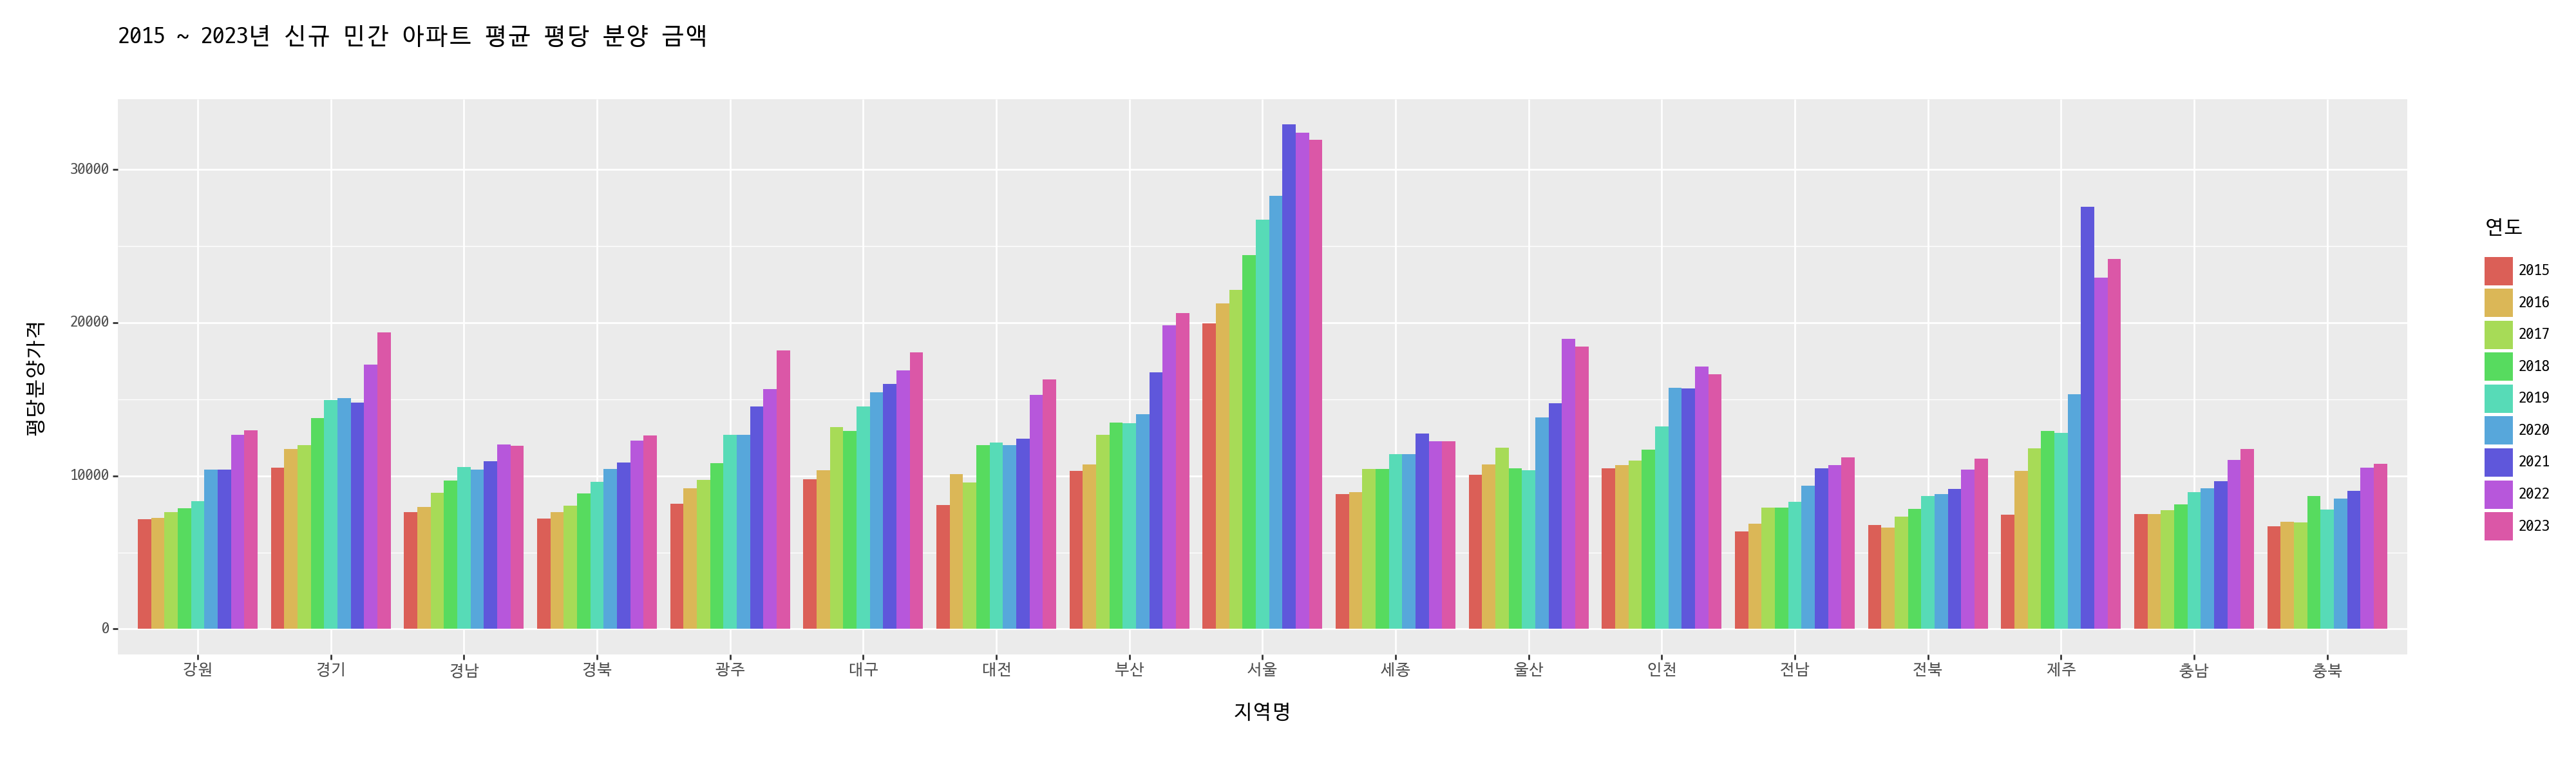

<Figure Size: (2000 x 600)>

In [114]:
# 연도별 평균 평당 분양 금액 시각화
ggplot(region_year_all , aes(x='지역명' , y='평당분양가격', fill='연도')) + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='D2Coding'), figure_size=(20,6)) + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 금액')

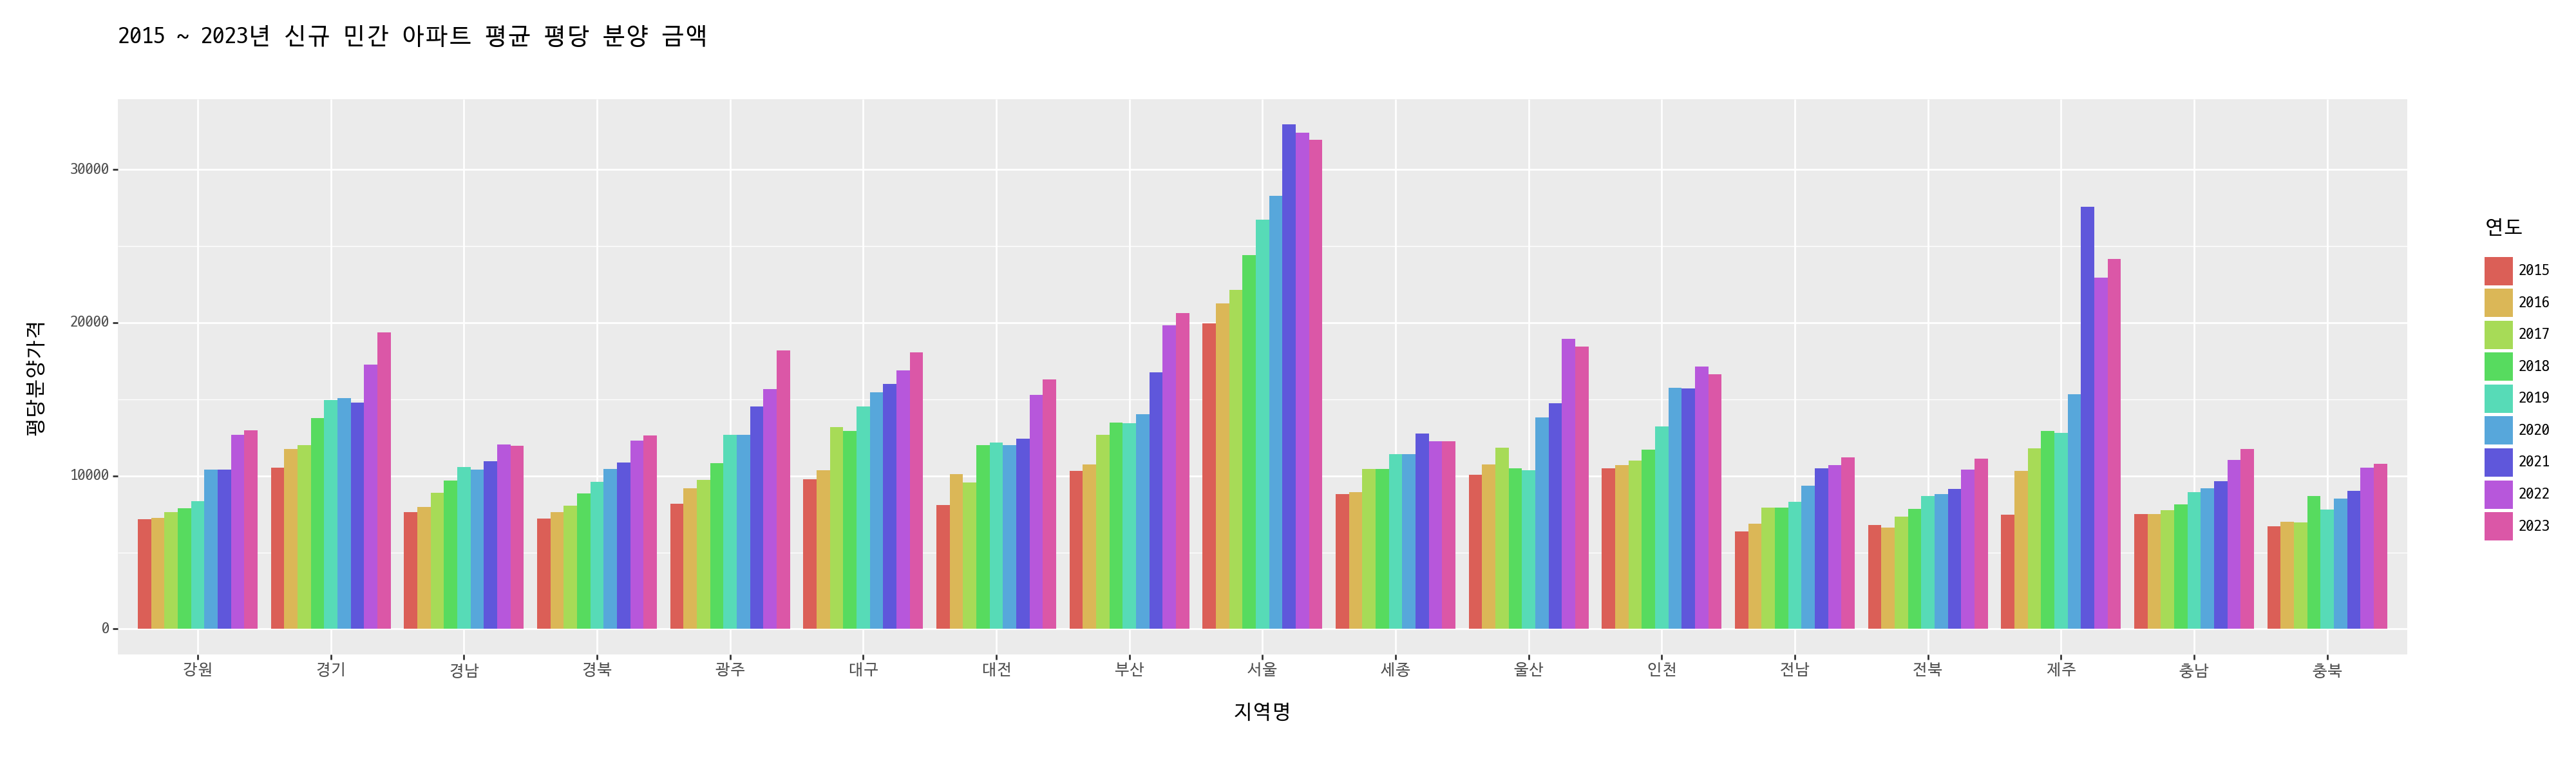

<Figure Size: (2000 x 600)>

In [117]:
(
    ggplot(region_year_all , aes(x='지역명' , y='평당분양가격', fill='연도')) + geom_bar(stat='identity', position='dodge') 
    + theme(text=element_text(family='D2Coding'), figure_size=(20,6)) 
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 금액')
)

In [119]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"


In [127]:
# 규모별 지역별 평균 평당 분양 금액 합계 피벗 테이블
per_sale_sum = per_sale.pivot_table('평당분양가격', '규모구분', '지역명', aggfunc='sum').reset_index()
print(per_sale_sum.columns.name)
per_sale_sum.columns.name = 'No'
per_sale_sum

지역명


No,규모구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,모든면적,"817,911.6","1,288,613.7","901,098.0","864,623.1","1,106,968.5","1,270,407.6","1,037,840.1","1,277,014.2","2,377,904.1","928,689.3","1,077,103.5","1,221,887.7","785,182.2","760,808.4","1,397,210.1","810,678.0","747,522.6"
1,전용면적 102제곱미터초과,"976,743.9","1,467,358.2","943,222.5","947,136.3","1,096,537.2","1,400,444.1","681,209.1","1,306,057.5","2,315,154.6","854,762.7","758,128.8","1,397,041.8","890,650.2","835,906.5","1,171,014.9","835,144.2","826,593.9"
2,전용면적 60제곱미터이하,"819,898.2","1,337,410.8","887,267.7","846,664.5","978,888.9","1,265,371.8","960,029.4","1,242,057.3","2,444,095.5","714,925.2","925,112.1","1,215,492.3","764,636.4","758,171.7","1,079,697.3","813,516.0","747,535.8"
3,전용면적 60제곱미터초과 85제곱미터이하,"803,203.5","1,285,155.3","896,685.9","862,082.1","1,095,431.7","1,271,222.7","1,033,431.3","1,274,582.1","2,373,538.2","890,310.3","1,081,888.5","1,220,914.2","782,793.0","757,610.7","1,374,390.6","837,421.2","751,271.4"
4,전용면적 85제곱미터초과 102제곱미터이하,"793,976.7","1,392,758.4","1,116,838.8","779,902.2","359,181.9","1,132,639.2","245,094.3","1,251,680.1","2,510,742.3","763,200.9","565,290.0","1,303,991.7","713,433.6","799,751.7","800,141.1","852,396.6","812,407.2"


In [131]:
per_sale_melt = pd.melt(per_sale_sum, '규모구분')
# per_sale_melt.columns = ['규모구분', '지역명', '평당분양가격']
per_sale_melt.rename(columns={'No': '지역명', 'value': '평당분양가격'}, inplace=True)
per_sale_melt

,규모구분,지역명,평당분양가격
0,모든면적,강원,"817,911.6"
1,전용면적 102제곱미터초과,강원,"976,743.9"
2,전용면적 60제곱미터이하,강원,"819,898.2"
3,전용면적 60제곱미터초과 85제곱미터이하,강원,"803,203.5"
4,전용면적 85제곱미터초과 102제곱미터이하,강원,"793,976.7"
...,...,...,...
80,모든면적,충북,"747,522.6"
81,전용면적 102제곱미터초과,충북,"826,593.9"
82,전용면적 60제곱미터이하,충북,"747,535.8"
83,전용면적 60제곱미터초과 85제곱미터이하,충북,"751,271.4"


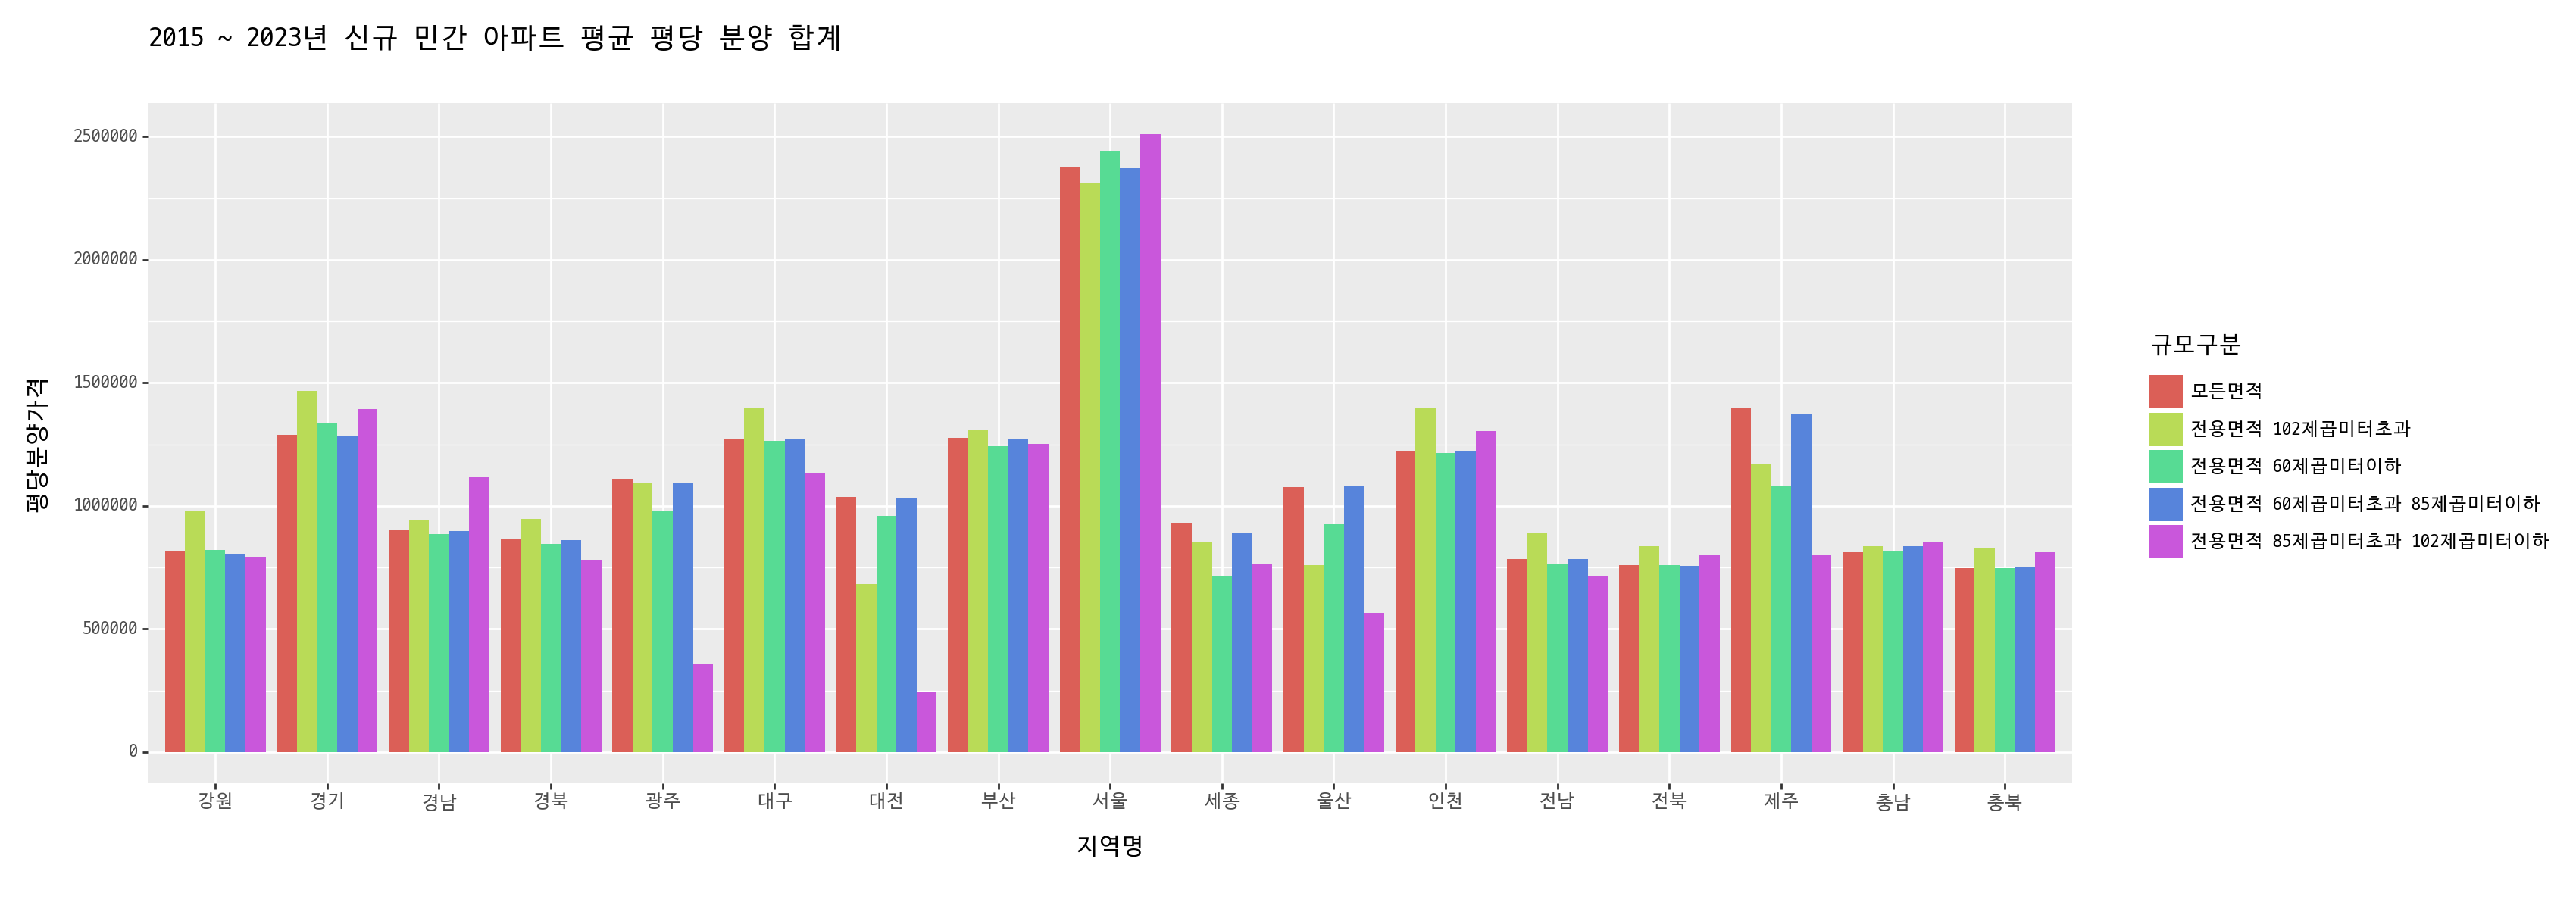

<Figure Size: (1700 x 600)>

In [140]:
# 규모별 지역별 평당 분양 금액 합계 시각화
(
    ggplot(per_sale_melt, aes(x='지역명', y='평당분양가격', fill='규모구분'))
        + geom_bar(stat='identity', position='dodge')
        + theme(text=element_text(family='D2Coding'), figure_size=(17, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 합계')
)

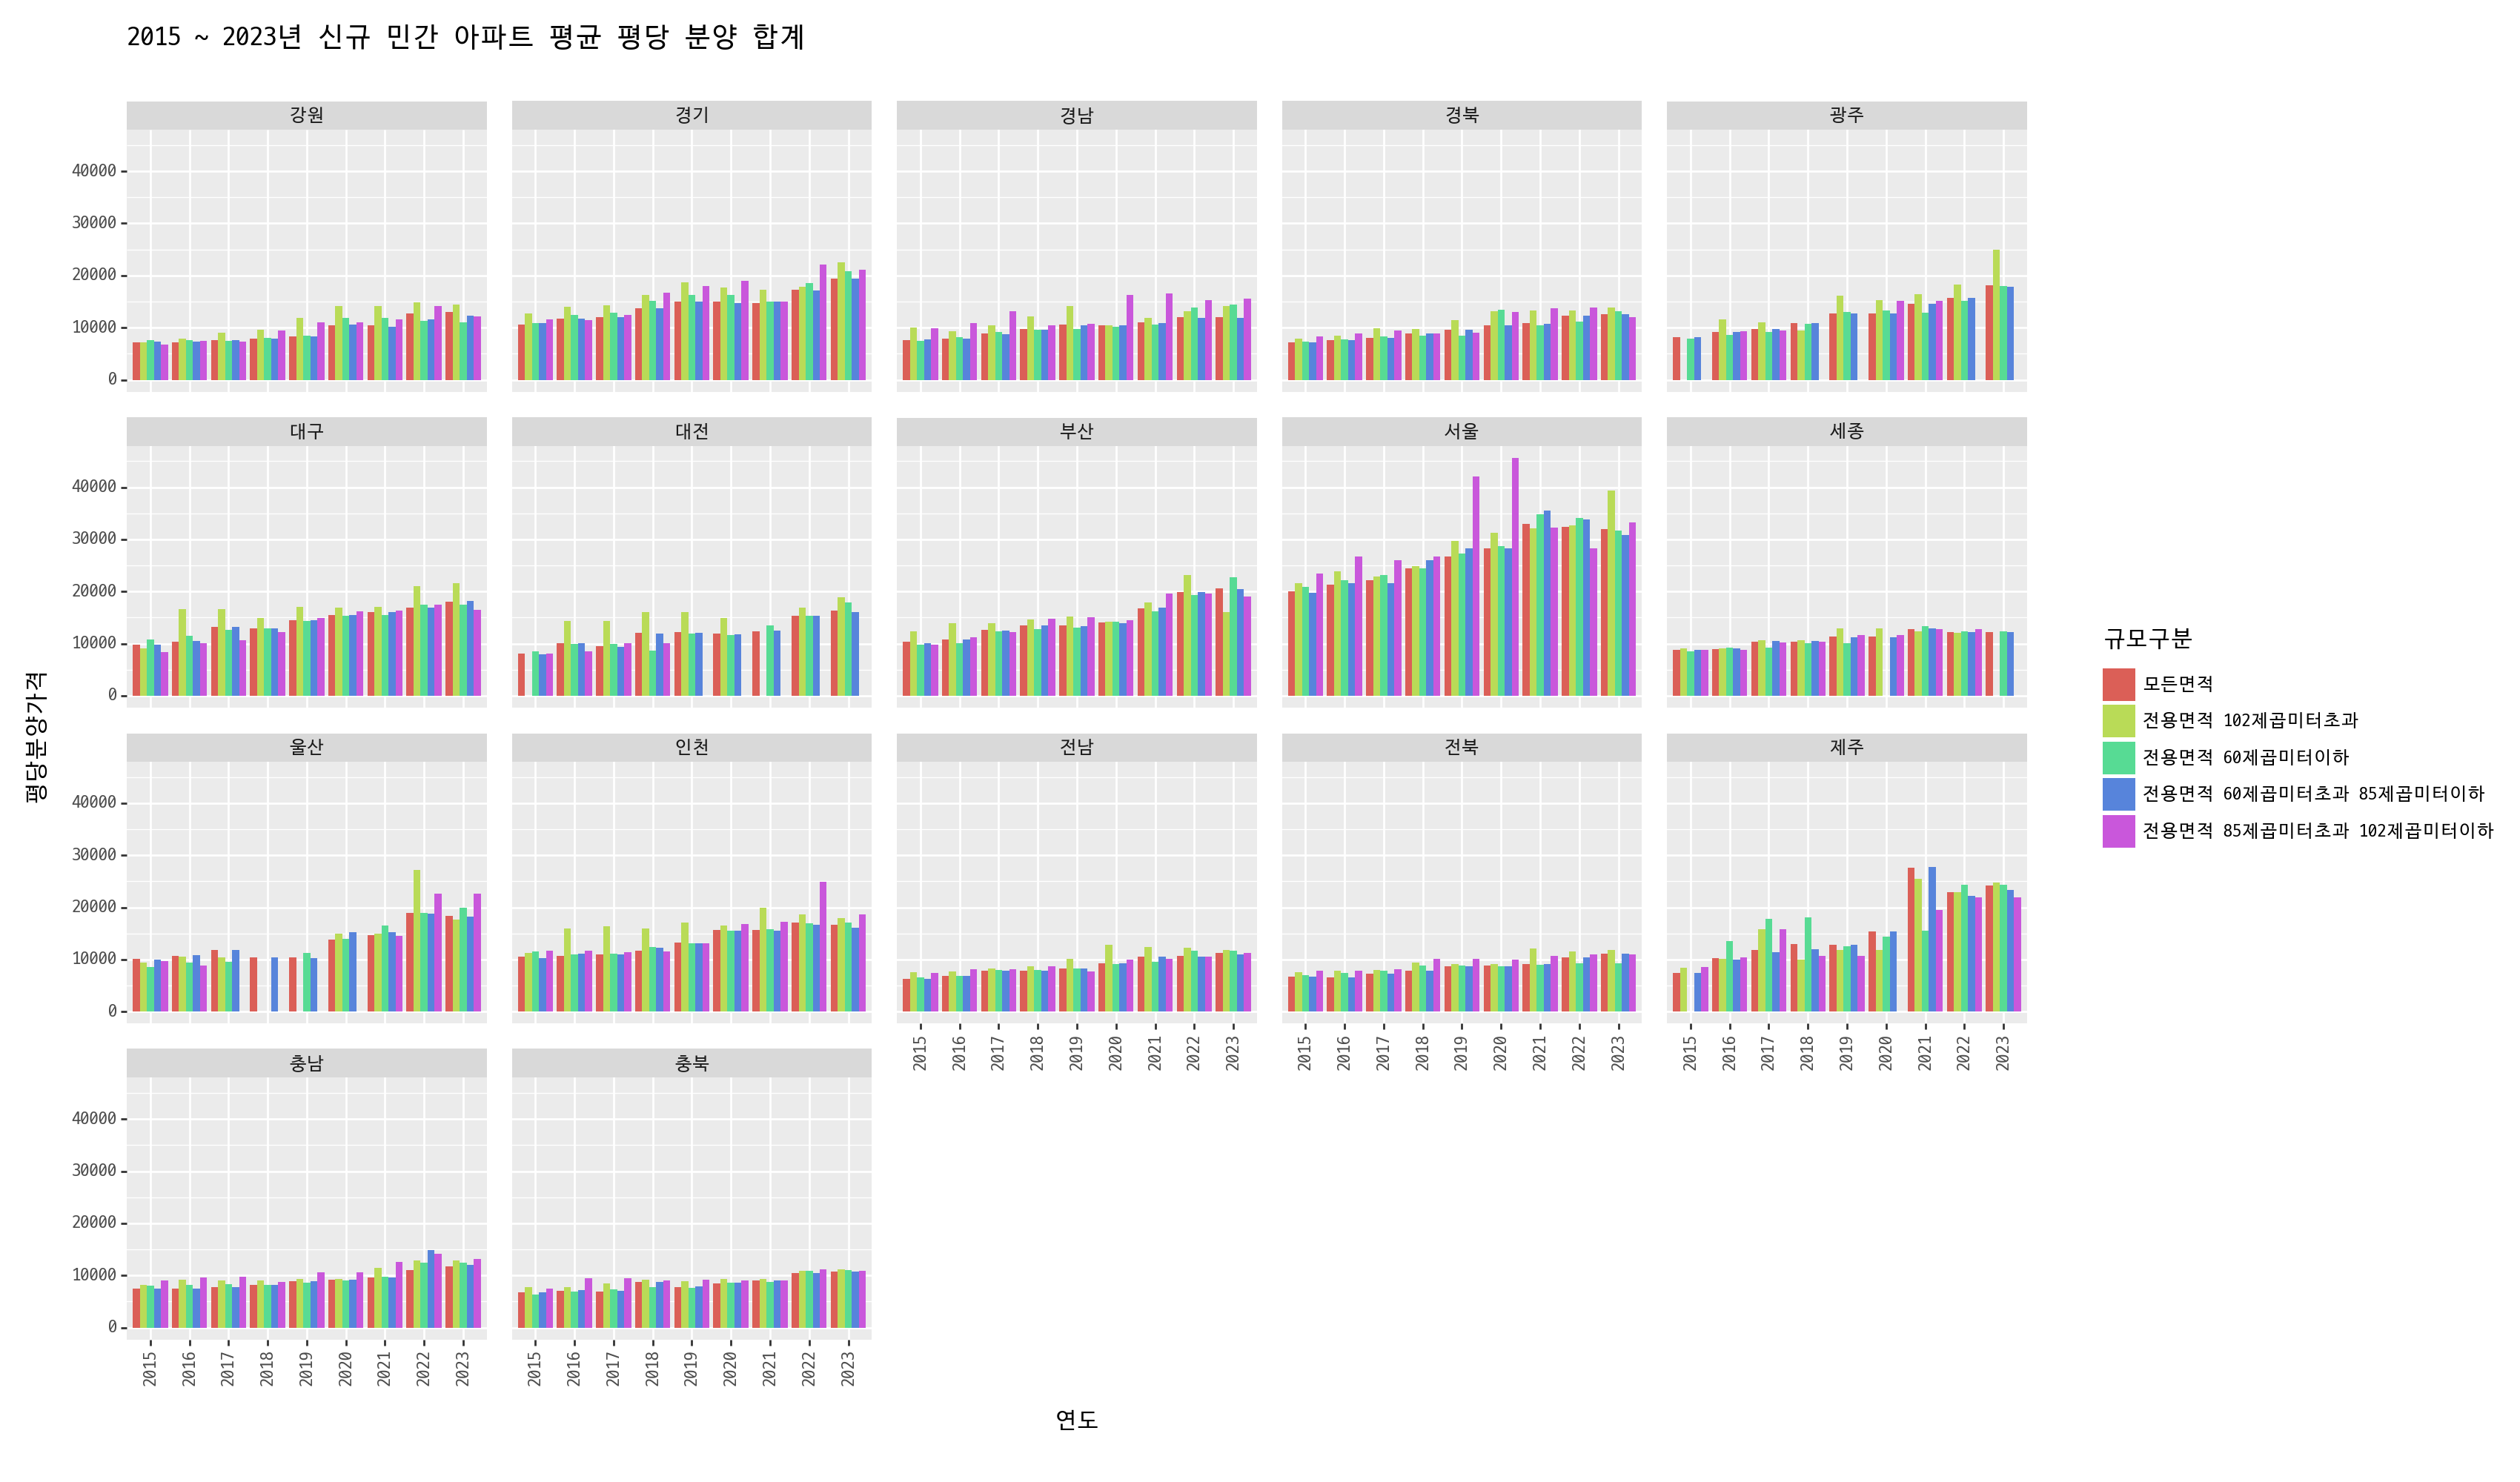

<Figure Size: (1700 x 1000)>

In [145]:
(
    ggplot(per_sale, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('지역명')
        + theme(text=element_text(family='D2Coding'), figure_size=(17, 10), axis_text_x=element_text(rotation=90))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 합계')
)

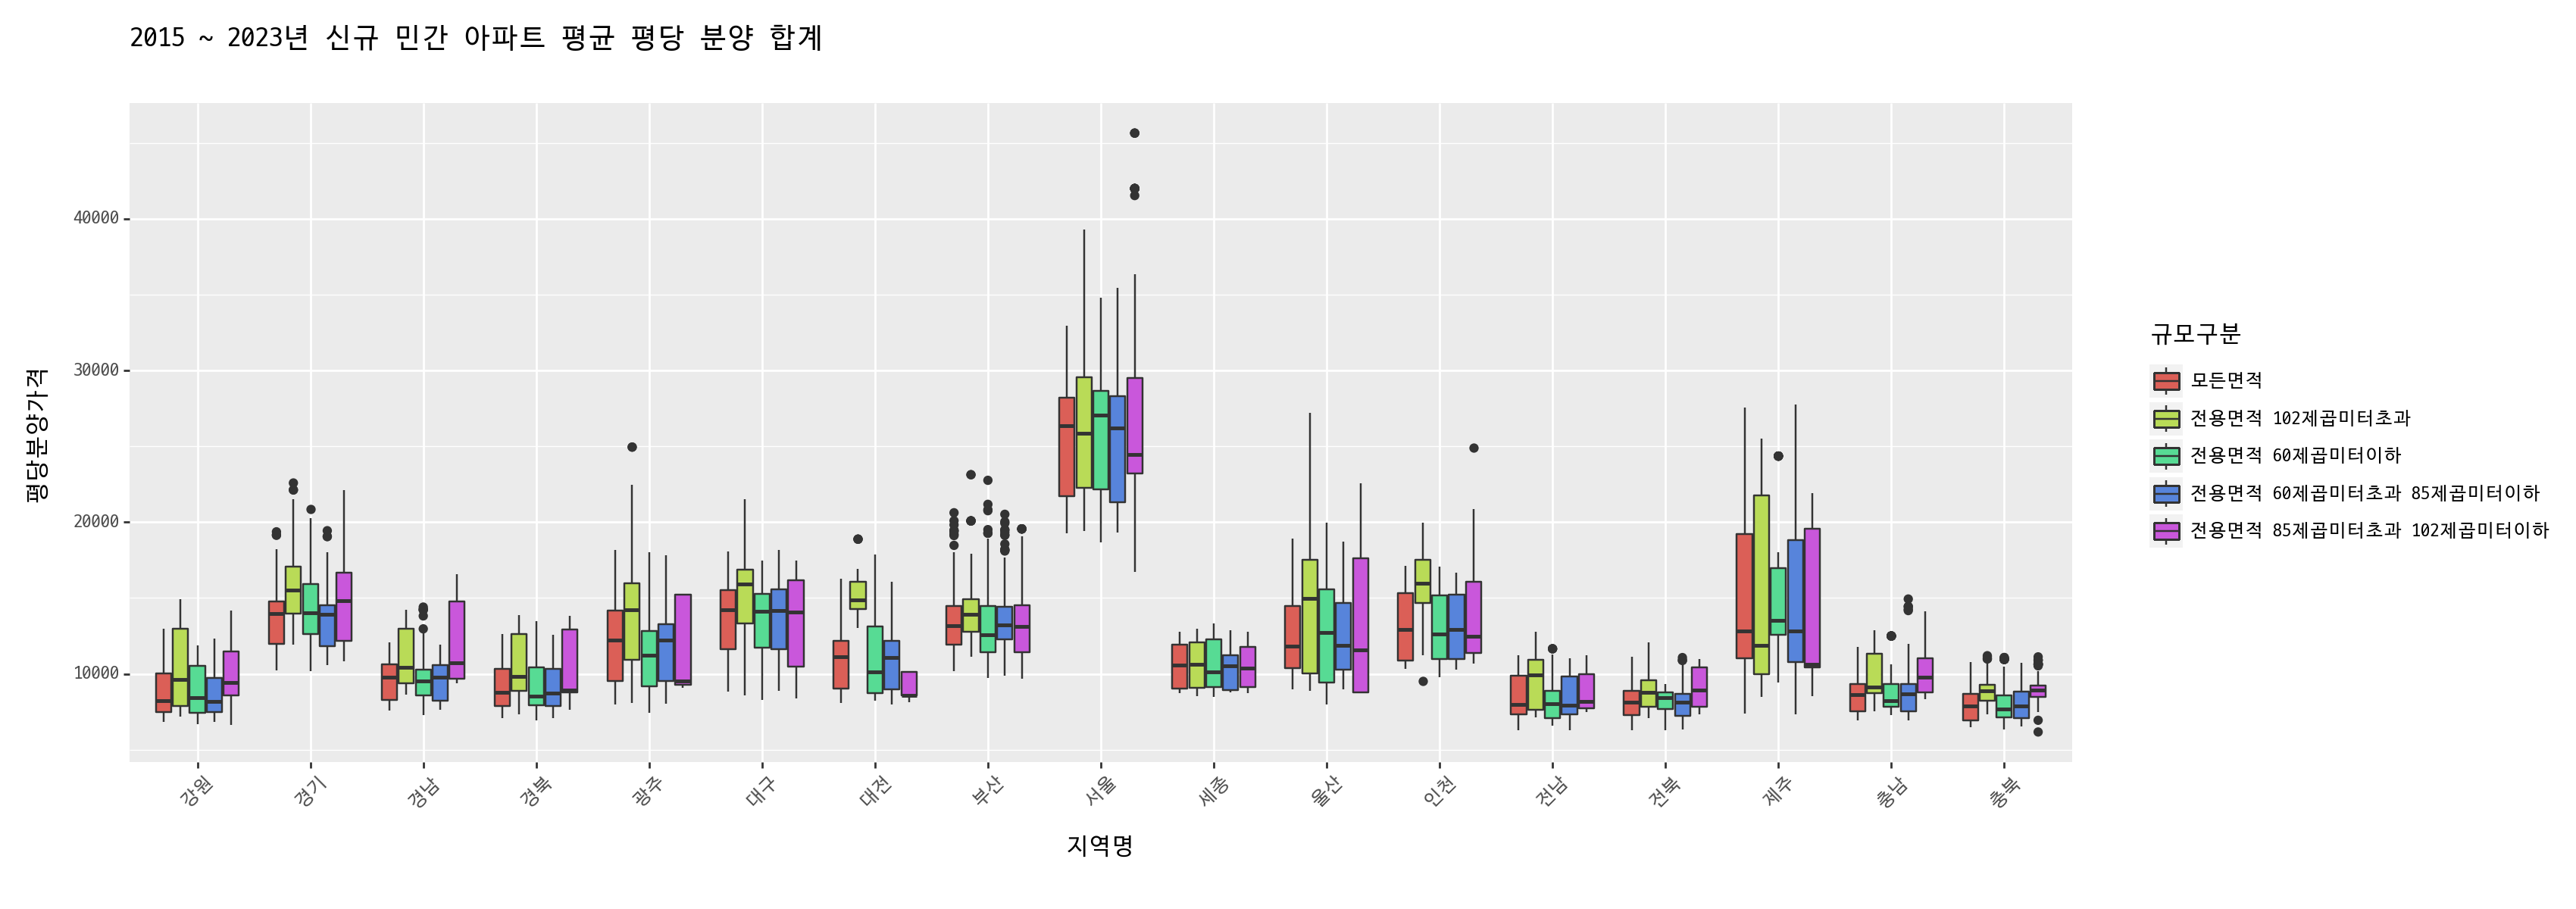

<Figure Size: (1700 x 600)>

In [147]:
# boxplot을 그려보자.
(
    ggplot(per_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='D2Coding'), figure_size=(17, 6), axis_text_x=element_text(rotation=45))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 합계')
)

In [150]:
#사업 규모가 가장 컸던 서울
per_sale_seoul = per_sale[per_sale['지역명'] == '서울']
per_sale_seoul

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
7820,서울,모든면적,2023,6,"9,675.0","31,927.5"
7821,서울,전용면적 60제곱미터이하,2023,6,"9,555.0","31,531.5"
7822,서울,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"9,325.0","30,772.5"
7823,서울,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"10,057.0","33,188.1"


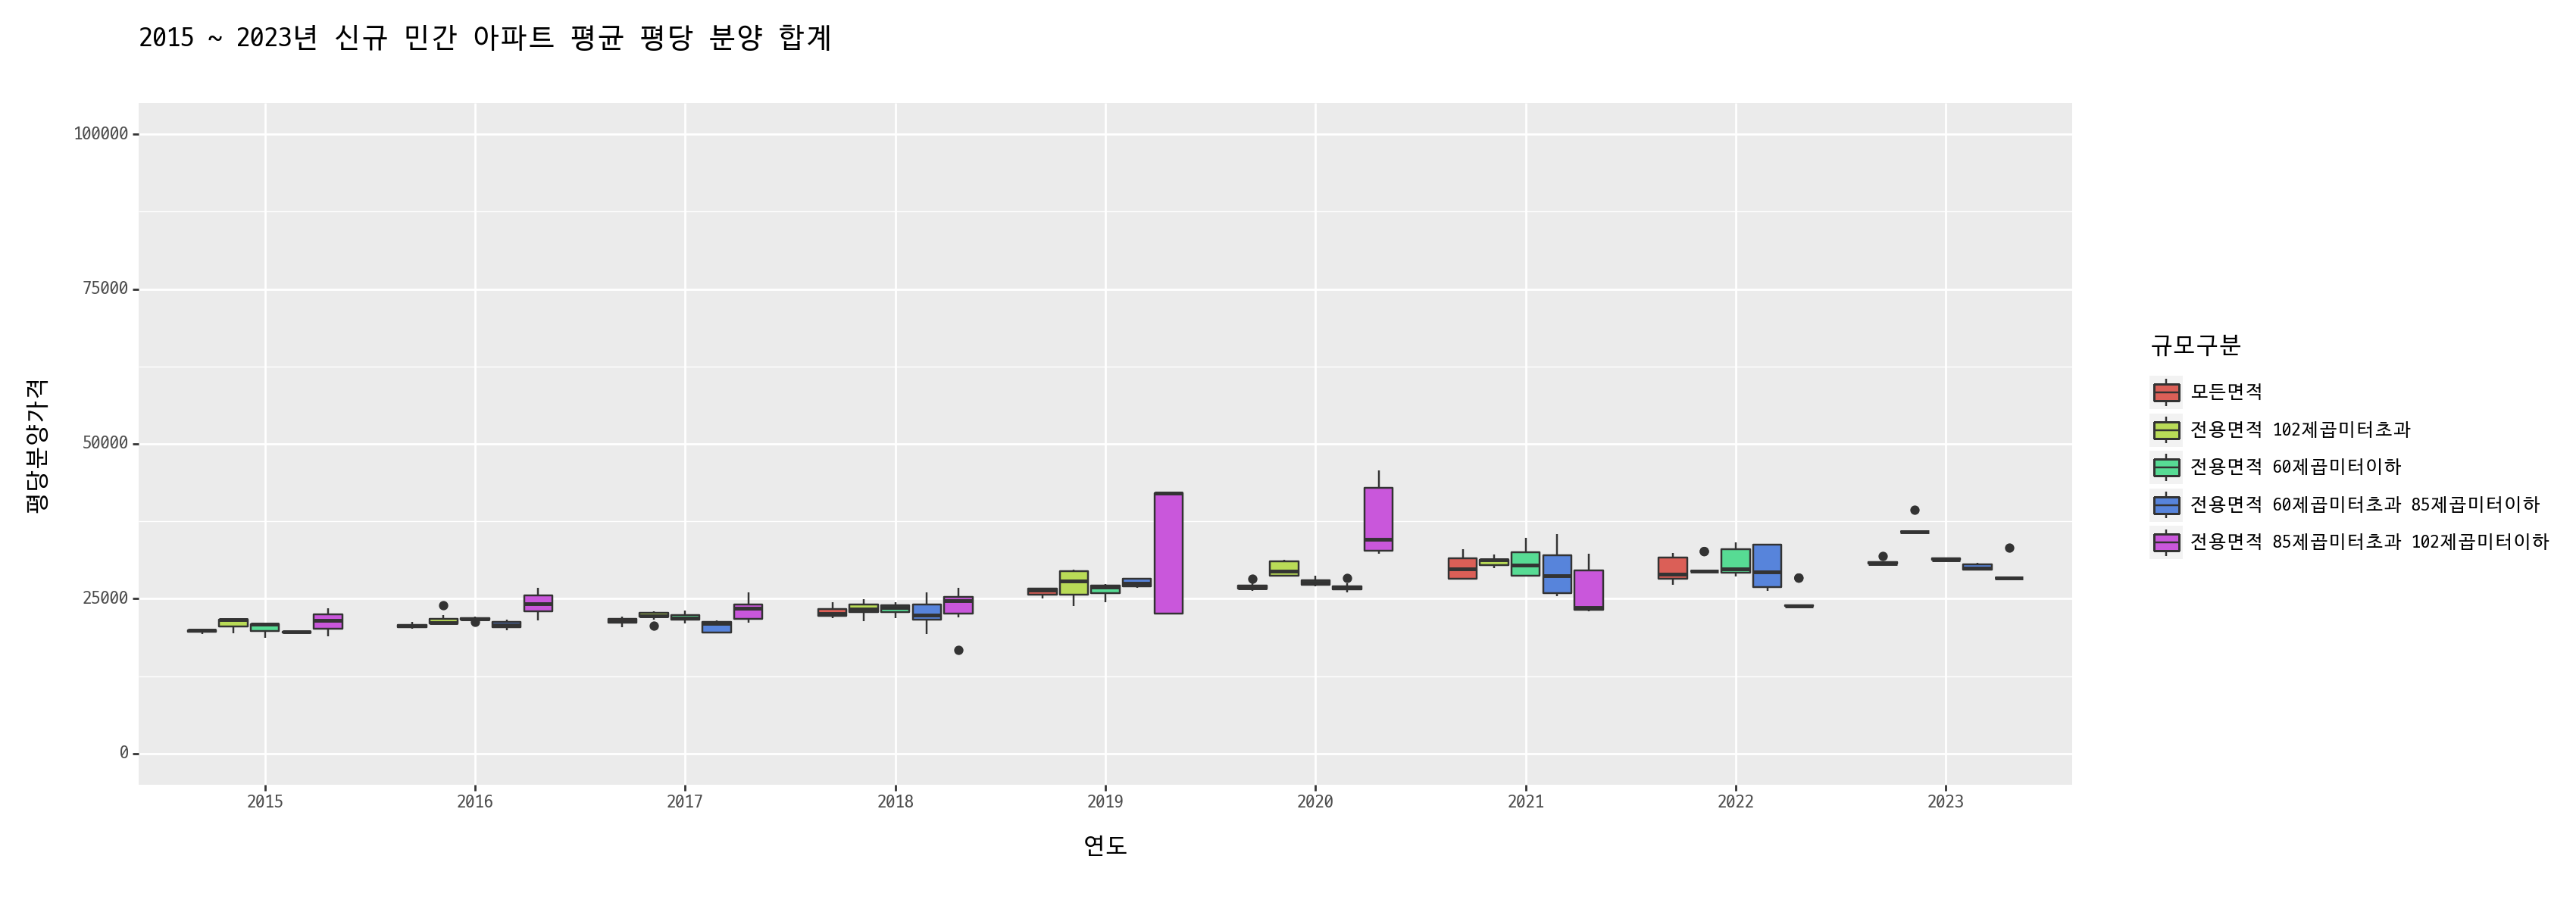

<Figure Size: (1700 x 600)>

In [157]:
# boxplot을 그려보자.
(
    ggplot(per_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='D2Coding'), figure_size=(17, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 합계')
        + scale_y_continuous(limits=(0, 100000))
)